<div><center><img src="https://ml.ucv.ai/logo.png\" width=150"/> </center></div>

# Tarea 3: Transformers y Stacked AutoEncoders
Juan Luis Fernández
Correo: juuanfz@gmail.com
CI: 28447019

Fuentes:

- [BRISC](https://www.kaggle.com/datasets/briscdataset/brisc2025)


# Descargando datos

Usaremos la librería kagglehub para descargar los datos. Por defecto, los datos son descargados en la `cache` de `.root` necesitamos moverlos a nuestro directorio luego de descargar.

In [2]:
import kagglehub
briscdataset_brisc2025_path = kagglehub.dataset_download('briscdataset/brisc2025')

print('Descarga de datos completa.')

Resuming download from 42991616 bytes (217550904 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/briscdataset/brisc2025?dataset_version_number=5 (42991616/260542520) bytes left.


100%|██████████| 248M/248M [01:03<00:00, 3.42MB/s] 

Extracting files...


Descarga de datos completa.


In [ ]:
#PARA LINUX
'''
!ls /root/.cache/kagglehub/datasets
'''

'\n!ls /root/.cache/kagglehub/datasets\n'

In [3]:
#PARA WINDOWS (sustituir la ruta por la de tu usuario)
!dir "C:\Users\juanf\OneDrive\Documentos\DL\[DL]_[Tarea3]_[28447019]"


 Volume in drive C has no label.
 Volume Serial Number is A8E8-12F1

 Directory of C:\Users\juanf\OneDrive\Documentos\DL\[DL]_[Tarea3]_[28447019]

08/07/2025  07:13 PM    <DIR>          .
08/06/2025  12:21 PM    <DIR>          ..
08/05/2025  11:58 PM           195,516 05_Autoencoders_StackedAE.ipynb
08/07/2025  12:04 AM            19,357 Informe.docx
08/06/2025  11:21 PM         1,230,805 Tarea3_DL.ipynb
08/07/2025  07:16 PM         2,172,138 [DL]_[Tarea3]_[28447019].ipynb
               4 File(s)      3,617,816 bytes
               2 Dir(s)  26,965,905,408 bytes free


In [1]:
#PARA LINUX
'''
!mv /root/.cache/kagglehub/datasets/briscdataset ./briscdataset
'''

'\n!mv /root/.cache/kagglehub/datasets/briscdataset ./briscdataset\n'

In [2]:
#PARA WINDOWS (sustituir la ruta por la de tu usuario)
!move "C:\Users\juanf\.cache\kagglehub\datasets\briscdataset" "C:\Users\juanf\OneDrive\Documentos\DL\[DL]_[Tarea3]_[28447019]\briscdataset"

The system cannot find the file specified.


Refresquen el directorio de Google Colab

# 🧠 BRISC 2025 Dataset Exploration

BRISC es un conjunto de datos de resonancias magnéticas de alta calidad, anotado por expertos, diseñado para la segmentación y clasificación de tumores cerebrales. Aborda limitaciones comunes en los conjuntos de datos existentes (p. ej., BraTS, Figshare), como el desequilibrio de clases, la focalización tumoral limitada y las inconsistencias en la anotación.

Esta sección provee métodos para entender los datos del dataset **BRISC 2025**. Está modificado para ser usado en `Google Colab` de un tutorial que funcionaba en `Kaggle`

1. Setup & Imports
2. Estructura del directorio  
3. Número de archivos y distribuciones
4. Representación gráfica de distribuciones
5. Numéro de clasificación por plano
6. Visualización de imágenes de muestra y máscaras
7. Histogramas de intensidad de píxeles
8. Análisis de metadatos de nombres de archivo
9. Ejemplo de superposición de máscaras
10. Cuadrícula aleatoria de muestras de clasificación


## ⚙️ 1. Setup & Imports

Librerías usadas por el tutorial. La mayoría conocidas:
- Archivo y manejo de directorios (`os`, `glob`)
- Datos (`pandas`, `numpy`)
- Procesamiento de imágenes (`PIL.Image`)
- Visualización (`matplotlib`)

Tomen en cuenta que usamos el directorio base luego de copiar en Google Colab.

In [3]:
# In[1] — Setup & Imports

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Render plots inline
%matplotlib inline

BASE_DIR = "briscdataset/brisc2025/versions/5/brisc2025/"
print("✅ Final BASE_DIR =", BASE_DIR)



✅ Final BASE_DIR = briscdataset/brisc2025/versions/5/brisc2025/


No cambien el código abajo, si copiaron bien los archivos debería verse como en la imagen

In [4]:
!dir "briscdataset/brisc2025/versions/5/brisc2025"

 Volume in drive C has no label.
 Volume Serial Number is A8E8-12F1

 Directory of c:\Users\juanf\OneDrive\Documentos\DL\[DL]_[Tarea3]_[28447019]\briscdataset\brisc2025\versions\5\brisc2025

08/07/2025  07:15 PM    <DIR>          .
08/07/2025  07:15 PM    <DIR>          ..
08/07/2025  07:15 PM    <DIR>          classification_task
08/07/2025  07:15 PM    <DIR>          segmentation_task
               0 File(s)              0 bytes
               4 Dir(s)  20,983,992,320 bytes free


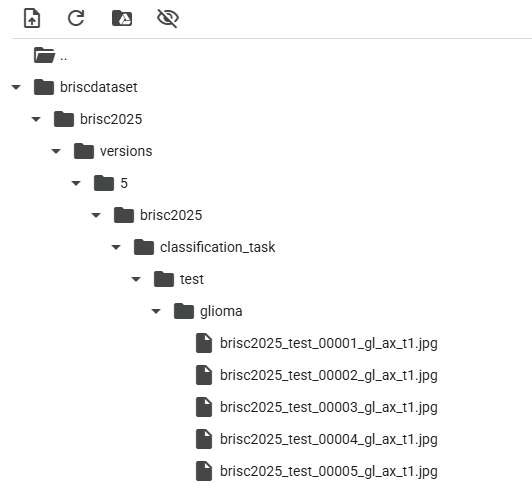

## 📂 2. Estructura del directorio

Navegamos recursivamente en el `BASE_DIR` (profundidad=2)

In [5]:
# In[2] — Directory Tree
def walk_dir(base, max_depth=2):
    for root, dirs, _ in os.walk(base):
        depth = root.replace(base, "").count(os.sep)
        if depth <= max_depth:
            indent = "  " * depth
            print(f"{indent}{os.path.basename(root)}/")
            for d in dirs:
                print(f"{indent}  {d}/")

print("## BRISC2025 Folder Layout:")
walk_dir(BASE_DIR, max_depth=2)


## BRISC2025 Folder Layout:
/
  classification_task/
  segmentation_task/
classification_task/
  test/
  train/
  test/
    glioma/
    meningioma/
    no_tumor/
    pituitary/
    glioma/
    meningioma/
    no_tumor/
    pituitary/
  train/
    glioma/
    meningioma/
    no_tumor/
    pituitary/
    glioma/
    meningioma/
    no_tumor/
    pituitary/
segmentation_task/
  test/
  train/
  test/
    images/
    masks/
    images/
    masks/
  train/
    images/
    masks/
    images/
    masks/


## 📊 3. Distribución de archivos

Contando cada imagen `.jpg` en cada uno de los split/clases.


In [6]:
# File Count Logic (no need to change if BASE_DIR is fixed)
def count_patterns(patterns):
    return sum(len(glob.glob(p)) for p in patterns)

# Classification
splits = ["train", "test"]
classes = ["glioma", "meningioma", "pituitary", "no_tumor"]
cls_records = []
for sp in splits:
    total = 0
    for cls in classes:
        pat = os.path.join(BASE_DIR, "classification_task", sp, cls, "*.jpg")
        cnt = count_patterns([pat])
        cls_records.append({'Split': sp, 'Class': cls, 'Count': cnt})
        total += cnt
    cls_records.append({'Split': sp, 'Class': 'Total', 'Count': total})
df_cls = pd.DataFrame(cls_records)

# Segmentation
types_ = ["images", "masks"]
seg_records = []
for sp in splits:
    for tp in types_:
        pats = [
            os.path.join(BASE_DIR, "segmentation_task", sp, tp, "*.jpg"),
            os.path.join(BASE_DIR, "segmentation_task", sp, tp, "*.png")
        ]
        cnt = count_patterns(pats)
        seg_records.append({'Split': sp, 'Type': tp, 'Count': cnt})
df_seg = pd.DataFrame(seg_records)

# Display
print("### Classification Counts")
display(df_cls)
print("### Segmentation Counts")
display(df_seg)


### Classification Counts


,Split,Class,Count
0,train,glioma,1147
1,train,meningioma,1329
2,train,pituitary,1457
3,train,no_tumor,1067
4,train,Total,5000
5,test,glioma,254
6,test,meningioma,306
7,test,pituitary,300
8,test,no_tumor,140
9,test,Total,1000


### Segmentation Counts


,Split,Type,Count
0,train,images,3933
1,train,masks,3933
2,test,images,860
3,test,masks,860


## 📊 4. Gráficos por distribuciones

Visualización del conjunto de datos


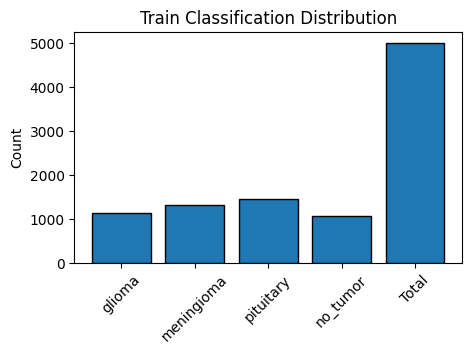

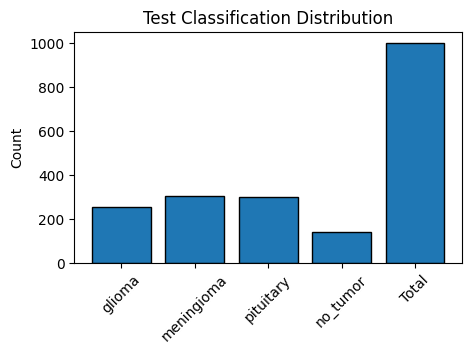

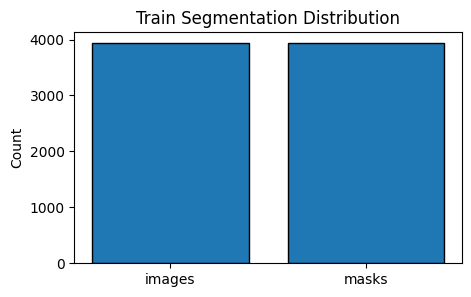

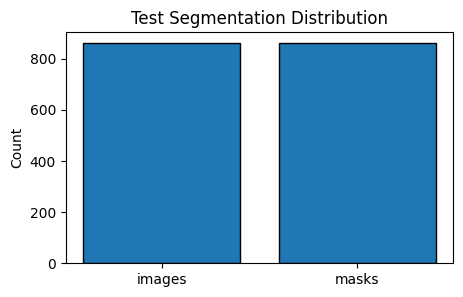

In [7]:
# In[4] — Distribution Plots
for sp in splits:
    sub = df_cls[df_cls.Split==sp]
    plt.figure(figsize=(5,3))
    plt.bar(sub.Class, sub.Count, edgecolor='k')
    plt.title(f"{sp.title()} Classification Distribution")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

for sp in splits:
    sub = df_seg[df_seg.Split==sp]
    plt.figure(figsize=(5,3))
    plt.bar(sub.Type, sub.Count, edgecolor='k')
    plt.title(f"{sp.title()} Segmentation Distribution")
    plt.ylabel("Count")
    plt.show()


## 📈 5. Clasificación por planos

Resumen anátomico dependiendo de los planos:

1. Ax: Axial
1. co: Coronal
1. sa: Sagittal

In [8]:
# In[5] — Per‑Plane Counts
planes = ["ax", "co", "sa"]
plane_records = []

for sp in splits:
    for cls in classes:
        for pl in planes:
            pat = os.path.join(
                BASE_DIR, "classification_task", sp, cls, f"*_{pl}_t1.jpg"
            )
            cnt = count_patterns([pat])
            plane_records.append({'Split': sp, 'Class': cls, 'Plane': pl, 'Count': cnt})

df_plane = pd.DataFrame(plane_records)
print("### Per‑Plane Counts Pivot")
display(df_plane.pivot_table(index='Plane', columns=['Split','Class'], values='Count'))


### Per‑Plane Counts Pivot


Split   test                                train                      \
Class glioma meningioma no_tumor pituitary glioma meningioma no_tumor   
Plane                                                                   
ax      85.0      137.0     52.0     124.0  394.0      423.0    352.0   
co      81.0       86.0     48.0      90.0  430.0      426.0    310.0   
sa      88.0       83.0     40.0      86.0  323.0      480.0    405.0   

Split            
Class pituitary  
Plane            
ax        426.0  
co        510.0  
sa        521.0

## 🖼️ 6. Imagen de ejemplo y máscaras

Ejemplo de una imagen de clasificación con su imagen de segmentación.

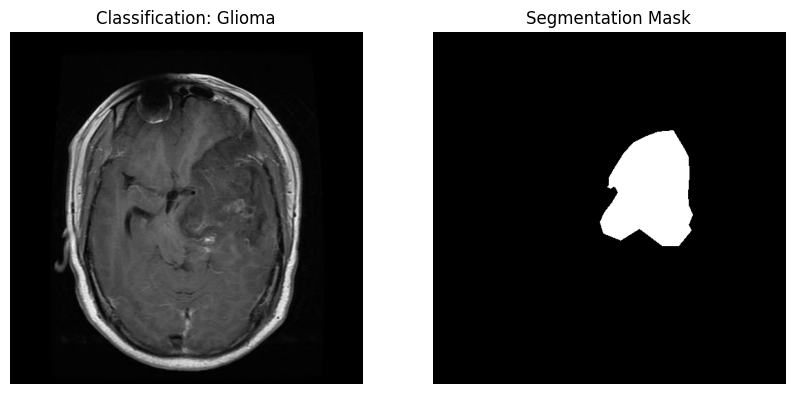

In [9]:
# In[6] — Sample Visualization
def first_file(folder, exts):
    for ext in exts:
        fl = glob.glob(os.path.join(folder, f"*.{ext}"))
        if fl: return fl[0]
    return None

img_path  = first_file(os.path.join(BASE_DIR, "classification_task/train/glioma"), ["jpg"])
mask_path = first_file(os.path.join(BASE_DIR, "segmentation_task/train/masks"), ["png","jpg"])

img  = Image.open(img_path)
mask = Image.open(mask_path)

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(img,  cmap="gray"); axes[0].set_title("Classification: Glioma"); axes[0].axis("off")
axes[1].imshow(mask, cmap="gray"); axes[1].set_title("Segmentation Mask");    axes[1].axis("off")
plt.show()

## 📈 7. Histogramas de frecuencias por píxeles

Píxeles de las imágenes y las máscaras.

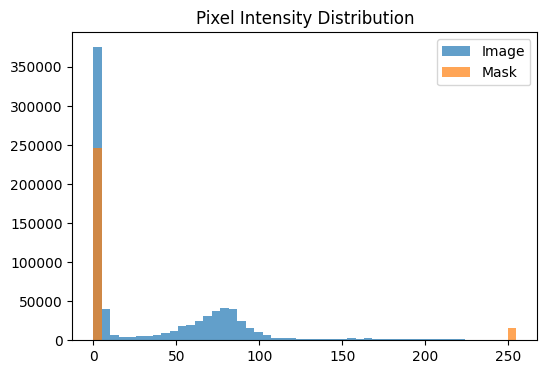

In [10]:
# In[7] — Histograms
arr_img  = np.array(img).ravel()
arr_mask = np.array(mask).ravel()

plt.figure(figsize=(6,4))
plt.hist(arr_img,  bins=50, alpha=0.7, label="Image")
plt.hist(arr_mask, bins=50, alpha=0.7, label="Mask")
plt.legend(); plt.title("Pixel Intensity Distribution"); plt.show()

## 📝 8. Parsing de metadata

Componentes del dataset transformados en una tabla. La columna Split dice a cuál corte irá cada imagen

In [11]:
# In[8] — Metadata Table
meta = []
for sp in splits:
    for cls in classes:
        files = glob.glob(os.path.join(BASE_DIR, "classification_task", sp, cls, "*.jpg"))[:1]
        for f in files:
            parts = os.path.basename(f).split("_")
            meta.append({
                "Filename": os.path.basename(f),
                "Split": parts[1],
                "Index": parts[2],
                "Tumor": parts[3],
                "Plane": parts[4],
                "Sequence": parts[5].split(".")[0]
            })
df_meta = pd.DataFrame(meta)
print("### Sample Filename Metadata")
display(df_meta)

### Sample Filename Metadata


,Filename,Split,Index,Tumor,Plane,Sequence
0,brisc2025_train_00001_gl_ax_t1.jpg,train,00001,gl,ax,t1
1,brisc2025_train_01148_me_ax_t1.jpg,train,01148,me,ax,t1
2,brisc2025_train_03544_pi_ax_t1.jpg,train,03544,pi,ax,t1
3,brisc2025_train_02477_no_ax_t1.jpg,train,02477,no,ax,t1
4,brisc2025_test_00001_gl_ax_t1.jpg,test,00001,gl,ax,t1
5,brisc2025_test_00255_me_ax_t1.jpg,test,00255,me,ax,t1
6,brisc2025_test_00701_pi_ax_t1.jpg,test,00701,pi,ax,t1
7,brisc2025_test_00561_no_ax_t1.jpg,test,00561,no,ax,t1


## 🔍 9. ejemplo de Overlay de la máscara

Overlay de la máscara en rojo sobre la resonancia.

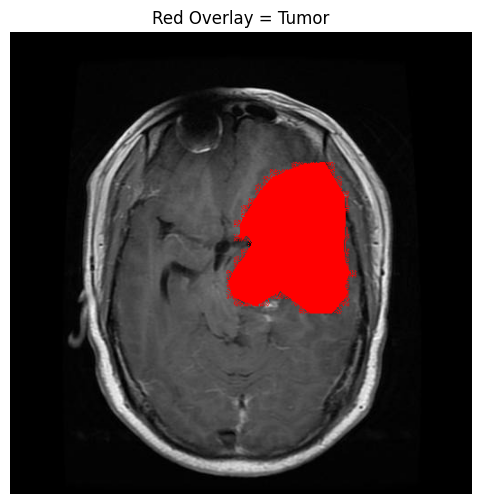

In [12]:
# In[9] — Overlay
img_rgb  = np.array(img.convert("RGB"))
mask_arr = np.array(mask)

overlay = img_rgb.copy()
overlay[mask_arr>0] = [255,0,0]

plt.figure(figsize=(6,6))
plt.imshow(overlay); plt.title("Red Overlay = Tumor"); plt.axis("off")
plt.show()

## 🔲 10. Grid aleatorio de ejemplos de clasificación

Desplegar un grid 3x3

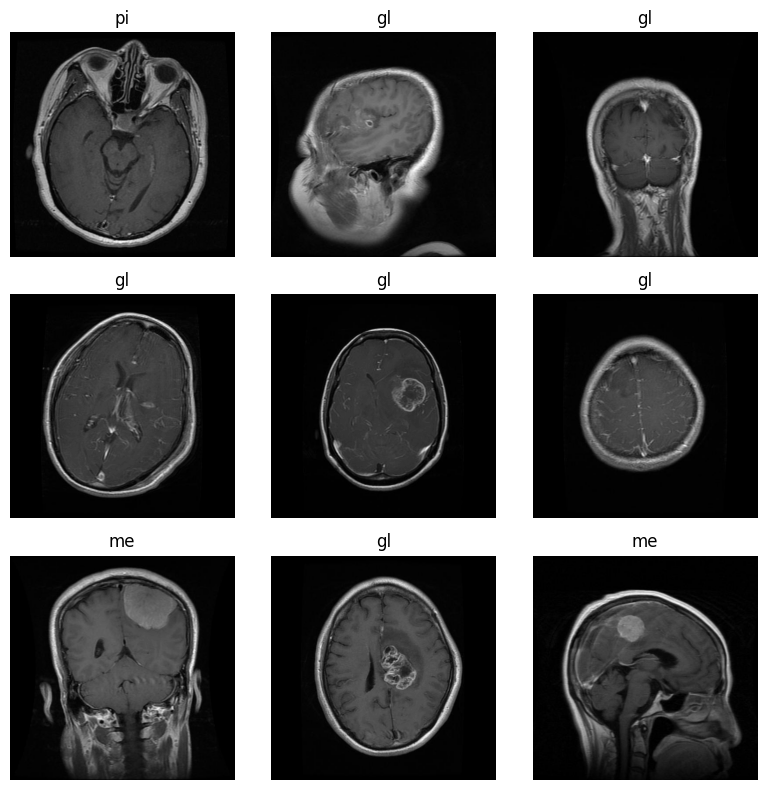

In [13]:
# In[10] — Random Grid
samples = glob.glob(os.path.join(BASE_DIR, "classification_task/train/*/*.jpg"))
grid = np.random.choice(samples, 9, replace=False)

fig, axes = plt.subplots(3,3, figsize=(8,8))
axes = axes.flatten()
for ax, fp in zip(axes, grid):
    im = Image.open(fp)
    cls = os.path.basename(fp).split("_")[3]
    ax.imshow(im, cmap="gray")
    ax.set_title(cls)
    ax.axis("off")
plt.tight_layout()
plt.show()

# ViT: El Visual Transformer

A continuación, tendrán la estructura del Visual Transformer. Su labor será utilizarlo en el task de `clasificación` de tumores del dataset `BRICS` haciendo énfasis en:

1. Cómo reajustar un codebase dado para un dataset de ejemplo?
1. Entender el modelo ViT para explicarlo a sus compañeros.
1. Cómo utilizar la matriz de atención en el caso de ViT? En qué ayuda en nuestro ejercicio?
1. Comparar nuestro ViT "casero" con el ViT de Huggingface.
1. Comparar ViT con un modelo de StackedAutoEncoders.
1. Utilizar `wandb` o `tensorboard` para el logging de los modelos.
1. Proyecto: Crear, en base al dataset dado, uno o unos gráficos custom de `wandb` siguiendo los ejemplos de [Custom charts](https://docs.wandb.ai/guides/app/features/custom-charts/)

Tienen libertad en todo el proyecto. Generen un pdf de resumen como hemos hecho en el curso y una presentación de no más de 15 diapositivas resumiendo la tarea.

Verificamos que tenemos acceso a la GPU. Si no están conectados.

In [14]:
!nvidia-smi

Fri Aug  8 00:51:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050      WDDM  |   00000000:09:00.0  On |                  N/A |
| 34%   44C    P0            N/A  /  115W |     806MiB /   8192MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Transformers

En esta sección, implementamos el modelo de 6 capas `ViT` (Vision Transformer) y lo entrenamos en el dataset `BRISC` como ejemplo. Consideramos, en consecuencia, el task de clasificación.

#### El Dataloader

In [15]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, utils, transforms
from torchvision.datasets import MNIST

def get_brics_loader(data_dir, image_size=224, batch_size=32, split_ratio=0.8, shuffle=True):
    """
    Carga el dataset BRICS usando ImageFolder. 
    Separa en entrenamiento y validación.

    Args:
        data_dir (str): Ruta al directorio raíz de BRICS (debe contener subfolders por clase).
        image_size (int): Tamaño al que se redimensionan las imágenes.
        batch_size (int): Tamaño de batch.
        split_ratio (float): Porcentaje de datos para entrenamiento.
        shuffle (bool): Si se mezclan los datos en DataLoader.

    Returns:
        train_loader, val_loader
    """
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.Lambda(lambda x: x.convert("RGB")),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])

    dataset = datasets.ImageFolder(root=data_dir, transform=transform)

    train_size = int(split_ratio * len(dataset))
    val_size = len(dataset) - train_size
    generator = torch.Generator().manual_seed(42)
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=generator)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader


### El modelo ViT

Recordemos que cada bloque de Transformer tiene 2 módulos:

1. El de Self-attention
1. El Lineal

In [16]:
%pip install einops

Note: you may need to restart the kernel to use updated packages.


In [17]:
from einops import rearrange

class Residual(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, **kwargs):
        return self.fn(x, **kwargs) + x

class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn

    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),   
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.net(x)

class Attention(nn.Module):
    def __init__(self, dim, heads=8):
        super().__init__()
        self.heads = heads
        self.scale = dim ** -0.5

        self.to_qkv = nn.Linear(dim, dim * 3, bias=False)
        self.to_out = nn.Linear(dim, dim)
        self.attn_map = None 

    def forward(self, x, mask=None):
        b, n, _, h = *x.shape, self.heads
        qkv = self.to_qkv(x)
        q, k, v = rearrange(qkv, 'b n (qkv h d) -> qkv b h n d', qkv=3, h=h)

        dots = torch.einsum('bhid,bhjd->bhij', q, k) * self.scale

        if mask is not None:
            mask = F.pad(mask.flatten(1), (1, 0), value=True)
            assert mask.shape[-1] == dots.shape[-1], 'mask has incorrect dimensions'
            mask = mask[:, None, :] * mask[:, :, None]
            dots.masked_fill_(~mask, float('-inf'))
            del mask

        attn = dots.softmax(dim=-1)
        self.attn_map = attn.detach().cpu() 

        out = torch.einsum('bhij,bhjd->bhid', attn, v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        out = self.to_out(out)
        return out

class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, mlp_dim, dropout=0.2):
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                Residual(PreNorm(dim, Attention(dim, heads = heads))),
                Residual(PreNorm(dim, FeedForward(dim, mlp_dim, dropout)))
            ]))

    def forward(self, x, mask=None):
        for attn, ff in self.layers:
            x = attn(x, mask=mask)
            x = ff(x)
        return x
    
class ViT(nn.Module):
    def __init__(self, *, image_size, patch_size, num_classes, dim, depth, heads, mlp_dim, channels=3, dropout=0.2):

        super().__init__()
        assert image_size % patch_size == 0, 'Importante: La dimensión de las imágenes debe ser divisible por el número de patches (Dimensión/Patches = número entero)'
        num_patches = (image_size // patch_size) ** 2
        patch_dim = channels * patch_size ** 2

        self.patch_size = patch_size

        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        self.patch_to_embedding = nn.Linear(patch_dim, dim)
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.transformer = Transformer(dim, depth, heads, mlp_dim, dropout)

        self.to_cls_token = nn.Identity()

        self.mlp_head = nn.Sequential(
            nn.Linear(dim, mlp_dim),
            nn.GELU(), # Gaussian error linear unit como función de activación
            nn.Linear(mlp_dim, num_classes)
        )

    def forward(self, img, mask=None):
        p = self.patch_size

        x = rearrange(img, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=p, p2=p) # Qué es esto? Investigar!!!!
        x = self.patch_to_embedding(x)

        cls_tokens = self.cls_token.expand(img.shape[0], -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding
        x = self.transformer(x, mask)

        x = self.to_cls_token(x[:, 0])
        return self.mlp_head(x)


### Entrenamiento y test

In [18]:
import wandb
import torch.nn.functional as F

def train_epoch(model, optimizer, data_loader, loss_history, epoch=None):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for i, (data, target) in enumerate(data_loader):
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.size(0)
        preds = output.argmax(dim=1)
        total_correct += (preds == target).sum().item()
        total_samples += data.size(0)

    avg_loss = total_loss / total_samples
    avg_accuracy = total_correct / total_samples
    loss_history.append(avg_loss)

    wandb.log({
        'epoch_train_loss': avg_loss,
        'epoch_train_accuracy': avg_accuracy
    }, step=epoch)


In [19]:
def evaluate(model, data_loader, loss_history, epoch=None, prefix='test'):
    model.eval()
    total_samples = len(data_loader.dataset)
    correct_samples = 0
    total_loss = 0

    with torch.no_grad():
        for data, target in data_loader:
            data = data.cuda()
            target = target.cuda()
            output = model(data)

            loss = F.cross_entropy(output, target, reduction='sum')
            _, pred = torch.max(output, dim=1)
            total_loss += loss.item()
            correct_samples += pred.eq(target).sum().item()

    avg_loss = total_loss / total_samples
    acc = correct_samples / total_samples

    loss_history.append(avg_loss)

    print(f"\n Eval — Loss: {avg_loss:.4f} | Accuracy: {correct_samples}/{total_samples} ({100.0 * acc:.2f}%)\n")

    # Logging a wandb
    wandb.log({
        f'{prefix}_loss': avg_loss,
        f'{prefix}_accuracy': acc
    }, step=epoch)

    return acc


## Entrenando!!

In [23]:
import math
import torchvision.transforms.functional as TF

def log_attention_overlay(model, image_tensor, label, epoch, class_names=None):
    model.eval()
    with torch.no_grad():
         # Forward pass
        output = model(image_tensor.unsqueeze(0).cuda())

        # Obtener atención de la primera capa y cabeza
        attn = model.transformer.layers[0][0].fn.fn.attn_map  # (1, heads, tokens, tokens)
        attn_cls = attn[0, 0, 0, 1:]  # atención del [CLS] hacia los tokens de imagen (sin el token [CLS] mismo)

        # Número de patches por lado
        num_patches = int(math.sqrt(attn_cls.shape[0]))  # ej: sqrt(196) = 14
        attn_map = attn_cls.reshape(num_patches, num_patches)  # (14x14)

        # Upsample al tamaño de la imagen original
        attn_map = attn_map.unsqueeze(0).unsqueeze(0)  # (1,1,H,W)
        attn_map = F.interpolate(attn_map, size=(224, 224), mode='bilinear', align_corners=False)
        attn_map = attn_map.squeeze().cpu().numpy()

        # Imagen original a formato numpy (para mostrar con matplotlib)
        img = TF.to_pil_image(image_tensor.cpu())
        img_np = np.array(img)

        # Mostrar heatmap sobre imagen
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(img_np)
        ax.imshow(attn_map, cmap='jet', alpha=0.5)  # alpha controla la transparencia
        title = f"Atención superpuesta - Época {epoch} - Clase: {label}"
        if class_names:
            title = f"{title} ({class_names[label]})"
        ax.set_title(title)
        ax.axis('off')

        wandb.log({f"attention_overlay_epoch_{epoch}": wandb.Image(fig)})
        plt.close()

In [24]:
import time

# You can change the architecture here
model = ViT(image_size=224, patch_size=16, num_classes=4, channels=3,
            dim=128, depth=6, heads=8, mlp_dim=256, dropout=0.2)
model = model.cuda()
# We also print the network architecture
model

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loss_history, test_loss_history = [], []

In [25]:
wandb.init(project="brisc-vit", name="ViT-Casero", reinit=True)
wandb.config.model_type = "ViT-Casero"

N_EPOCHS = 20

train_loader, test_loader = get_brics_loader(BASE_DIR, image_size=224, batch_size=32, shuffle=True)

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

start_time = time.time()
for epoch in range(1, N_EPOCHS + 1):
    print(f'Época: {epoch}, LR: {scheduler.get_last_lr()[0]:.6f}')

    train_epoch(model, optimizer, train_loader, train_loss_history, epoch=epoch)
    acc = evaluate(model, test_loader, test_loss_history, epoch=epoch)
    scheduler.step()

    wandb.log({
        'epoch': epoch,
        'train_loss': train_loss_history[-1],
        'test_loss': test_loss_history[-1],
        'test_accuracy': acc, 
        'learning_rate': scheduler.get_last_lr()[0]
    }, step=epoch)

    # Atención visual
    if epoch % 5 == 0 or epoch == 1:
        sample_img, sample_label = next(iter(test_loader))
        sample_img = sample_img[0].cuda()
        label = sample_label[0].item()
        log_attention_overlay(model, sample_img, label, epoch, class_names=['Benign', 'Malignant', 'Normal', 'Suspicious'])

print(f'Tiempo de ejecución: {time.time() - start_time:.2f} segundos')

epoch,▁
epoch_train_accuracy,▁
epoch_train_loss,▁
learning_rate,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,1
epoch_train_accuracy,0.67501
epoch_train_loss,0.5054
learning_rate,0.00095


Época: 1, LR: 0.001000

 Eval — Loss: 0.4971 | Accuracy: 2007/3118 (64.37%)


 Eval — Loss: 0.4971 | Accuracy: 2007/3118 (64.37%)

Época: 2, LR: 0.000950
Época: 2, LR: 0.000950

 Eval — Loss: 0.4841 | Accuracy: 2153/3118 (69.05%)

Época: 3, LR: 0.000902

 Eval — Loss: 0.4841 | Accuracy: 2153/3118 (69.05%)

Época: 3, LR: 0.000902

 Eval — Loss: 0.4692 | Accuracy: 2154/3118 (69.08%)

Época: 4, LR: 0.000857

 Eval — Loss: 0.4692 | Accuracy: 2154/3118 (69.08%)

Época: 4, LR: 0.000857

 Eval — Loss: 0.4929 | Accuracy: 2151/3118 (68.99%)

Época: 5, LR: 0.000815

 Eval — Loss: 0.4929 | Accuracy: 2151/3118 (68.99%)

Época: 5, LR: 0.000815

 Eval — Loss: 0.4646 | Accuracy: 2154/3118 (69.08%)


 Eval — Loss: 0.4646 | Accuracy: 2154/3118 (69.08%)

Época: 6, LR: 0.000774
Época: 6, LR: 0.000774

 Eval — Loss: 0.4616 | Accuracy: 2126/3118 (68.18%)

Época: 7, LR: 0.000735

 Eval — Loss: 0.4616 | Accuracy: 2126/3118 (68.18%)

Época: 7, LR: 0.000735

 Eval — Loss: 0.4677 | Accuracy: 2154/3118 (69.08%)


# Hugginface vs UCV

Ahora, comparemos el rendimiento de nuestro `ViT` con el de Hugginface

In [ ]:
%pip install transformers

In [ ]:
%pip install datasets

In [26]:
import torch
from transformers import ViTImageProcessorFast, ViTForImageClassification, pipeline
from datasets import load_dataset, DatasetDict, Dataset

pipeline = pipeline(
    task="image-classification",
    model="google/vit-base-patch16-224",
    torch_dtype=torch.float16,
    device=0
)

c:\Users\juanf\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0
Device set to use cuda:0


In [27]:
pipeline("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg")

[{'label': 'lynx, catamount', 'score': 0.4355783462524414},
 {'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor',
  'score': 0.0347900353372097},
 {'label': 'snow leopard, ounce, Panthera uncia',
  'score': 0.03230144828557968},
 {'label': 'Egyptian cat', 'score': 0.02391081489622593},
 {'label': 'tabby, tabby cat', 'score': 0.02281586080789566}]

El problema fundamental para nosotros, es que el modelo `google/vit-base-patch16-224` acepta imágenes $224 \times 224$.

Por lo tanto, tenemos que usar el `ViTImageProcessorFast` para poder escalarlas.

Hacemos el proceso para BRISC


In [28]:
processor = ViTImageProcessorFast.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224") # Por qué el nombre es patch16-224?

In [29]:
def load_brisc_dataset(base_dir):
    data = {'train': [], 'test': []}
    splits = ['train', 'test']
    classes = ["glioma", "meningioma", "pituitary", "no_tumor"]

    for split in splits:
        for label_idx, cls in enumerate(classes):
            files = glob.glob(os.path.join(base_dir, 'classification_task', split, cls, '*.jpg'))
            for f in files:
                data[split].append({'image_path': f, 'label': label_idx})  

    return DatasetDict({
        'train': Dataset.from_list(data['train']),
        'test': Dataset.from_list(data['test'])
    })

brisc_dataset = load_brisc_dataset(BASE_DIR)


In [30]:
from PIL import Image

primera_imagen = Image.open(brisc_dataset["train"][0]["image_path"])

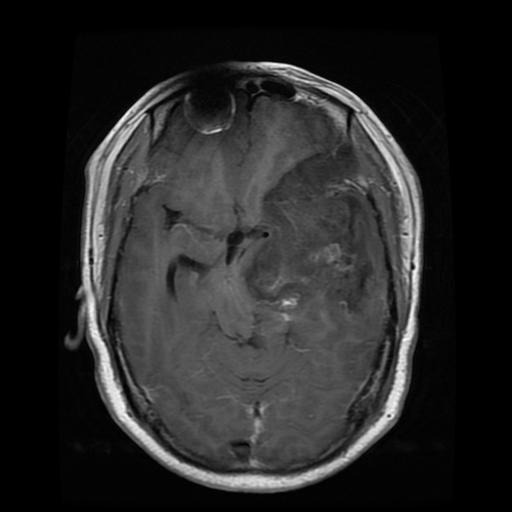

In [31]:
primera_imagen

In [32]:
print(primera_imagen.size)

(512, 512)


In [33]:
print(primera_imagen.mode)

RGB


In [34]:
if primera_imagen.mode != "RGB":
    primera_imagen = primera_imagen.convert('RGB')

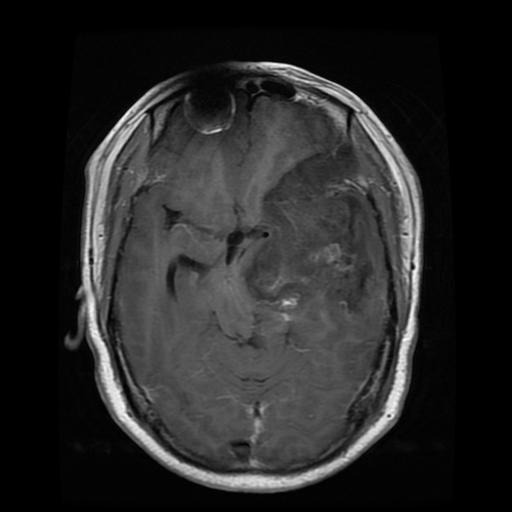

In [35]:
primera_imagen

In [36]:
primera_imagen.mode

'RGB'

In [37]:
inputs = processor(primera_imagen, return_tensors="pt")

In [38]:
inputs

{'pixel_values': tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]])}

In [39]:
print("Shape de la imagen", inputs["pixel_values"].shape)

Shape de la imagen torch.Size([1, 3, 224, 224])


Fíjense cómo ahora la imagen es `(1, 3, 224, 224)` referente a:

1. Batch size: 1
1. Canales: 3
1. Ancho: 224
1. Alto: 224

In [40]:
from torch.nn.functional import softmax

with torch.no_grad():
    outputs = model(**inputs)
    predicciones = softmax(outputs.logits, dim=-1)
    clase_id = predicciones.argmax().item()
    confianza = predicciones.max().item()

print(f"La clase es {clase_id}")
print(f"La confianza es {confianza}")


La clase es 18
La confianza es 0.05756140127778053


Como el `ViT` de huggingface fue entrenado para 1000 clases. Debemos reutilizarlo y modificarlo para las clases de BRISC.

Recordemos que el proceso de reutilizar un modelo para modificar solamente las capas de clasificación se conoce como `fine-tuning`

# Fine Tuning con BRISC

In [41]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import (
    ViTImageProcessorFast,
    ViTForImageClassification,
    ViTConfig,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
from datasets import load_dataset
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import os
from tqdm import tqdm

## Creando el Dataset

In [42]:
class BRISCDataset(Dataset):
    def __init__(self, dataset, processor, transform=None):
        self.dataset = dataset
        self.processor = processor
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image_path = item['image_path']
        label = item['label']

        image = Image.open(image_path).convert('RGB') 

        if self.transform:
            image = self.transform(image)

        inputs = self.processor(images=image, return_tensors="pt")

        return {
            'pixel_values': inputs['pixel_values'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }


## Setup y procesador

En esta sección, cargamos el modelo pre entrenado de Huggingface y lo modificamos al task de clasificación de MNIST.

Fíjense que la cantidad de clases a usar depende de nosotros (cambiando el parámetro)

In [43]:
def setup_modelo_con_processor(
    n_classes=4, # Default 4 porque es BRISC
    freeze_parameters=True,
    pretrained_model="google/vit-base-patch16-224",
    debug=True
):
    """
    En esta sección:
    1) Llamamos al modelo ViT pre-entrenado
    2) Modificamos la cabecera
    3) Dedicimos si modificar TODOS los pesos o solamente la capa lineal
    """
    if debug:
        print("*** Setup modelo con processor ***")
    # Cargamos el processor
    processor = ViTImageProcessorFast.from_pretrained(pretrained_model)

    # Modificamos la configuración del clasificador
    config = ViTConfig.from_pretrained(pretrained_model)
    config.num_labels = n_classes
    config.id2label = {i: str(i) for i in range(n_classes)}
    config.label2id = {str(i): i for i in range(n_classes)}

    model = ViTForImageClassification.from_pretrained(
        pretrained_model,
        config=config ,
        ignore_mismatched_sizes=True
    )

    if debug:
        print(f"Modelo cargado con {config.num_labels} clases")
        print(f"Dimensión de la capa de clasificación (luego del cambio) {model.classifier.weight.shape}")

    # To Freeze or not to Freeze
    if freeze_parameters:
        for param in model.vit.parameters():
            param.requires_grad = False

    return model, processor, config


## Carga y preparación de los datos

Esta sección usa el BRISC dataset creado antes para devolver el train_dataset y el test_dataset

In [44]:
def cargar_y_preparar_datos(processor, debug=True):
    """Cargar datos usando el processor"""
    if debug:
        print("*** Cargar y preparar datos ***")
    # Crear datasets
    train_dataset = BRISCDataset(brisc_dataset['train'], processor)
    test_dataset = BRISCDataset(brisc_dataset['test'], processor)

    if debug:
        print(f"Datos de entrenamiento: {len(train_dataset)}")
        print(f"Datos de test: {len(test_dataset)}")

    return train_dataset, test_dataset

## Trainer

In [ ]:
%pip install wandb

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sentry-sdk>=2.0.0 in c:\users\juanf\appdata\local\programs\python\python310\lib\site-packages (from wandb) (2.34.1)



In [45]:

def compute_metrics(eval_pred):
    """Compute accuracy metrics for evaluation"""
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}

def fine_tune_con_trainer(model, train_dataset, test_dataset, output_dir="./UCV-vit-brisc-finetuned", debug=True):
    """Fine-tune using HuggingFace Trainer"""

    # Training arguments
    # Verificar https://huggingface.co/docs/transformers/en/main_classes/trainer
    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=5,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=64,
        warmup_steps=0,
        weight_decay=0.01,
        logging_dir=f'{output_dir}/logs',
        logging_steps=10,
        eval_strategy="steps",
        eval_steps=100,
        save_strategy="steps",
        save_steps=100,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        greater_is_better=True,
        remove_unused_columns=False,
        push_to_hub=False,
        report_to="wandb",  # Disable wandb/tensorboard !!!!!PROYECTO!!!!!
    )

    # Initialiar el entrenador
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
    )
    if debug:
        print("Comenzando fine-tuning...")

    # Entrenar el modelo
    trainer.train()

    # Evaluar el model
    if debug:
        print("Evaluating on test set...")
    eval_results = trainer.evaluate()

    if debug:
        print(f"Test Accuracy: {eval_results['eval_accuracy']:.4f}")

    # Salvar el modelo
    trainer.save_model()
    if debug:
        print(f"Model saved to {output_dir}")

    return trainer, eval_results

In [46]:
def test_inference(model, processor, num_samples=5):
    """Test inference en un split aleatorio de los datos"""

    classes = ["glioma", "meningioma", "pituitary", "no_tumor"]
    test_data = brisc_dataset['test']

    device = next(model.parameters()).device
    model.eval()

    num_samples = 5
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        idx = np.random.randint(0, len(test_data))
        sample = test_data[idx]
        image_path = sample['image_path']
        true_label = sample['label']

        image = Image.open(image_path).convert('RGB')
        inputs = processor(images=image, return_tensors="pt")
        pixel_values = inputs['pixel_values'].to(device)

        with torch.no_grad():
            outputs = model(pixel_values=pixel_values)
            probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
            predicted_class = torch.argmax(probabilities, dim=-1).item()
            confidence = probabilities.max().item()

        true_label_name = classes[true_label]
        predicted_class_name = classes[predicted_class]

        axes[i].imshow(image)
        axes[i].set_title(f'True: {true_label_name}\nPred: {predicted_class_name}\nConf: {confidence:.3f}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

### Salvando y carga en el caso de modelos salvados

In [47]:
def save_model_for_deployment(model, processor, save_path="./vit-brisc-final", load=False, debug=True):
    """
    Salvar y upload de modelos
    """
    if load:
            # Test loading
        try:
            loaded_model = ViTForImageClassification.from_pretrained(save_path)
            loaded_processor = ViTImageProcessorFast.from_pretrained(save_path)
            if debug:
                print("✓ Modelo y processor cargados correctamente!")
            return loaded_model, loaded_processor
        except Exception as e:
            print(f"✗ Error loading model: {e}")
            return None, None
    else:
        os.makedirs(save_path, exist_ok=True)

        # Save model
        model.save_pretrained(save_path)

        # Save processor
        processor.save_pretrained(save_path)

        if debug:
            print(f"Modelo y processor salvados en {save_path}")



## Fine-Tuning pipeline

1. Setup y processor
1. Cargar datos
1. Entrenar

In [48]:
wandb.init(project="brisc-vit", name="ViT-Huggingface", reinit=True)
wandb.config.model_type = "ViT-Huggingface"


print("ViT fine tuning")

model, processor, config = setup_modelo_con_processor(freeze_parameters=False)
train_dataset, test_dataset = cargar_y_preparar_datos(processor)
trainer, eval_results = fine_tune_con_trainer(model, train_dataset, test_dataset)

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch_train_accuracy,▁▇▆▆▆▇█▆█▆█▇▇█▆▇█▆██
epoch_train_loss,█▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
learning_rate,█▇▇▆▆▅▅▅▄▄▃▃▃▃▂▂▂▁▁▁
test_accuracy,▁████▇█▅▆█▅██▇▅█████
test_loss,▇▅▃▆▃▃▃▂▂▃█▃▂▃▂▁▂▁▁▂
train_loss,█▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,20
epoch_train_accuracy,0.69145
epoch_train_loss,0.44634
learning_rate,0.00036


ViT fine tuning
*** Setup modelo con processor ***


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo cargado con 4 clases
Dimensión de la capa de clasificación (luego del cambio) torch.Size([4, 768])
*** Cargar y preparar datos ***
Datos de entrenamiento: 5000
Datos de test: 1000
Comenzando fine-tuning...
Comenzando fine-tuning...


Step,Training Loss,Validation Loss,Accuracy
100,0.109700,0.116112,0.954000
200,0.028000,0.102714,0.968000
300,0.037900,0.039226,0.990000
400,0.002200,0.179641,0.947000
500,0.000500,0.045213,0.988000
600,0.001500,0.036595,0.990000


Evaluating on test set...


Test Accuracy: 0.9900
Model saved to ./UCV-vit-brisc-finetuned
Model saved to ./UCV-vit-brisc-finetuned


In [69]:
class StackedAutoEncoder(nn.Module):
    def __init__(self, input_dim=224*224*3, latent_dim=128, num_classes=4):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, latent_dim),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim)
        )

        self.classifier = nn.Linear(latent_dim, num_classes)

    def forward(self, x, mode="classify"):
        x = x.view(x.size(0), -1)
        latent = self.encoder(x)
        
        if mode == "classify":
            return self.classifier(latent)
        elif mode == "reconstruct":
            reconstruction = self.decoder(latent)
            return reconstruction
        elif mode == "both":
            return self.classifier(latent), self.decoder(latent)
        else:
            raise ValueError("Mode must be 'classify', 'reconstruct', or 'both'")


autoencoder = StackedAutoEncoder().cuda()
optimizer_ae = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)

import wandb

wandb.init(project="brisc-vit", name="AutoEncoder-BRICS", reinit=True)
wandb.config.model_type = "StackedAutoEncoder"
wandb.config.input_dim = 224*224*3
wandb.config.latent_dim = 128
wandb.config.epochs = 5
wandb.config.learning_rate = 1e-3


# Usar los mismos DataLoaders que para ViT Casero
for epoch in range(5):
    print(f"AutoEncoder Epoch {epoch+1}")
    train_epoch(autoencoder, optimizer_ae, train_loader, [])
    evaluate(autoencoder, test_loader, [])


epoch_train_accuracy,▁▅▇▇█
epoch_train_loss,█▂▁▁▁
test_accuracy,▁▅▄▇█
test_loss,█▂▂▁▁
epoch_train_accuracy,0.8064
epoch_train_loss,0.50736
test_accuracy,0.805
test_loss,0.53287


AutoEncoder Epoch 1

 Eval — Loss: 0.9453 | Accuracy: 603/1000 (60.30%)

AutoEncoder Epoch 2

 Eval — Loss: 0.9783 | Accuracy: 630/1000 (63.00%)

AutoEncoder Epoch 3

 Eval — Loss: 0.5418 | Accuracy: 784/1000 (78.40%)

AutoEncoder Epoch 4

 Eval — Loss: 0.7524 | Accuracy: 709/1000 (70.90%)

AutoEncoder Epoch 5

 Eval — Loss: 0.9587 | Accuracy: 645/1000 (64.50%)



In [56]:
# Custom Chart: Confianza promedio por clase (wandb)
import wandb
import numpy as np

def log_custom_chart(model, processor, dataset, class_names):
    model.eval()
    device = next(model.parameters()).device

    class_confidences = {cls: [] for cls in class_names}

    for sample in dataset:
        image = Image.open(sample['image_path']).convert('RGB')
        inputs = processor(images=image, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
            confidence = probs.max().item()
            pred_class = probs.argmax().item()

        true_class = sample['label']
        class_confidences[class_names[true_class]].append(confidence)

    # Calcular promedio de confianza por clase
    avg_confidences = {cls: np.mean(vals) for cls, vals in class_confidences.items()}

    # Subirlo a WandB (log as dict, WandB will show as bar chart)
    wandb.log({"Confidence by Class": avg_confidences})

# EJECUTA:
class_names = ["glioma", "meningioma", "pituitary", "no_tumor"]
log_custom_chart(model, processor, brisc_dataset['test'], class_names)


## Ejemplo de predicciones

In [57]:
#test_inference(model, processor, num_samples=5)

classes = ["glioma", "meningioma", "pituitary", "no_tumor"]

# Veamos qué labels tiene el dataset
print("Labels en el Dataset Test:")
for i in range(10):
    print(f"Sample {i} -> Label: {brisc_dataset['test'][i]['label']}")

# Luego corre inference en 1 sola imagen para debug
sample = brisc_dataset['test'][0]
true_label = int(sample['label'])

if true_label < 0 or true_label >= len(classes):
    print(f"Label fuera de rango: {true_label} en muestra 0")
    true_label = 0  # O puedes hacer 'continue' si prefieres saltarla

# Realiza la inferencia solo para este sample
image = Image.open(sample['image_path']).convert('RGB')
inputs = processor(images=image, return_tensors="pt").to(model.device)

with torch.no_grad():
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(probabilities, dim=-1).item()
    confidence = probabilities.max().item()

true_label_name = classes[true_label]
predicted_class_name = classes[predicted_class]

print(f"True Label: {true_label_name} | Predicted: {predicted_class_name} | Conf: {confidence:.3f}")



Labels en el Dataset Test:
Sample 0 -> Label: 0
Sample 1 -> Label: 0
Sample 2 -> Label: 0
Sample 3 -> Label: 0
Sample 4 -> Label: 0
Sample 5 -> Label: 0
Sample 6 -> Label: 0
Sample 7 -> Label: 0
Sample 8 -> Label: 0
Sample 9 -> Label: 0
True Label: glioma | Predicted: glioma | Conf: 0.999


# Salvando modelo en directorio custom

Colocamos la bandera `load=False` si solo queremos salvar

In [58]:
# Cambia el directorio de guardado para evitar conflictos de acceso en Windows
save_model_for_deployment(model, processor, save_path="./vit-brisc-final-v2", load=False)

Modelo y processor salvados en ./vit-brisc-final-v2


# Cargando un modelo salvado

In [59]:
def visualize_attention_maps(model, processor, image_path, layer=11, head=0):
    import matplotlib.pyplot as plt
    from torchvision.transforms import ToTensor
    import numpy as np

    model.eval()
    device = next(model.parameters()).device

    # Cargar imagen
    image = Image.open(image_path).convert('RGB')
    inputs = processor(images=image, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model.vit(**inputs, output_attentions=True)

    attentions = outputs.attentions  # List of attention maps per layer
    attention = attentions[layer][0, head]  # (num_tokens, num_tokens)

    # Quitar cls_token
    image_size = int(np.sqrt(attention.shape[0]-1))
    attn_map = attention[0, 1:].reshape(image_size, image_size).cpu().numpy()

    # Normalizar y agrandar al tamaño de la imagen
    attn_map = (attn_map - attn_map.min()) / (attn_map.max() - attn_map.min())
    attn_map = Image.fromarray((attn_map * 255).astype(np.uint8)).resize(image.size)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(image)
    plt.imshow(attn_map, cmap='jet', alpha=0.5)
    plt.title(f'Attention Map Layer {layer}, Head {head}')
    plt.axis('off')
    plt.show()



`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


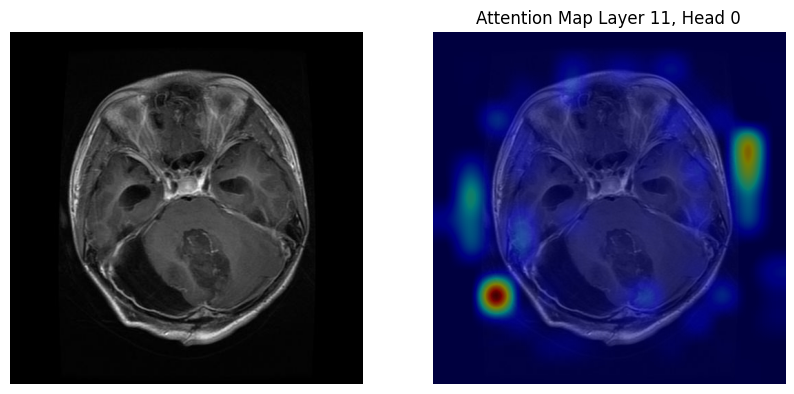

In [60]:
# EJECUTA:
sample = brisc_dataset['test'][0]
visualize_attention_maps(model, processor, sample['image_path'])

In [66]:
model_saved, processor_saved = save_model_for_deployment(model=None, processor=None, save_path="./vit-brisc-final-v2", load=True)

✓ Modelo y processor cargados correctamente!


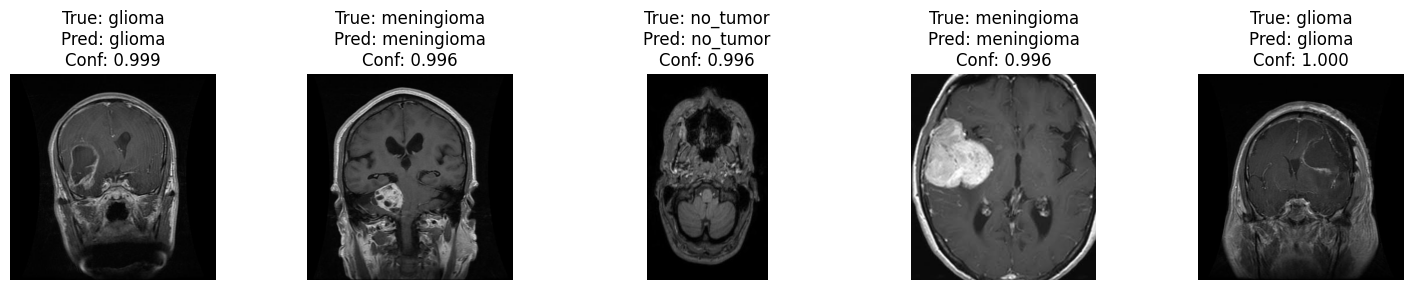

In [67]:
test_inference(model_saved, processor_saved, num_samples=5)

##  ¿Cómo funciona el Vision Transformer (ViT)?

1. **Divide la imagen** en pequeños bloques (patches).
2. Cada bloque se aplana y se convierte en un vector.
3. Se agrega una **posición** para que el modelo sepa el orden de los bloques.
4. Pasa todo a una red Transformer (como las de lenguaje).
5. La última salida es usada para clasificar la imagen.

Es como convertir una imagen en una oración, donde cada "palabra" es un pedazo de imagen.
